In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("datasets/Amazon_Sale_Report.csv")

C:\Users\tssat\AppData\Local\Temp\ipykernel_9128\2701817476.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("datasets/Amazon_Sale_Report.csv")


In [3]:
print(data.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


In [4]:
less_relevant_columns = [
    'Order ID',
    'ship-service-level',
    'Style',
    'ASIN',
    'Courier Status',
    'ship-city',
    'ship-state',
    'ship-postal-code',
    'ship-country',
    'B2B',
    'fulfilled-by',
    'Unnamed: 22'
]
data.drop(columns=less_relevant_columns)

,index,Date,Status,Fulfilment,Sales Channel,SKU,Category,Size,Qty,currency,Amount,promotion-ids
0,0,04-30-22,Cancelled,Merchant,Amazon.in,SET389-KR-NP-S,Set,S,0,INR,647.62,NaN
1,1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE3781-KR-XXXL,kurta,3XL,1,INR,406.00,Amazon PLCC Free-Financing Universal Merchant ...
2,2,04-30-22,Shipped,Amazon,Amazon.in,JNE3371-KR-XL,kurta,XL,1,INR,329.00,IN Core Free Shipping 2015/04/08 23-48-5-108
3,3,04-30-22,Cancelled,Merchant,Amazon.in,J0341-DR-L,Western Dress,L,0,INR,753.33,NaN
4,4,04-30-22,Shipped,Amazon,Amazon.in,JNE3671-TU-XXXL,Top,3XL,1,INR,574.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,05-31-22,Shipped,Amazon,Amazon.in,JNE3697-KR-XL,kurta,XL,1,INR,517.00,NaN
128971,128971,05-31-22,Shipped,Amazon,Amazon.in,SET401-KR-NP-M,Set,M,1,INR,999.00,IN Core Free Shipping 2015/04/08 23-48-5-108
128972,128972,05-31-22,Shipped,Amazon,Amazon.in,J0157-DR-XXL,Western Dress,XXL,1,INR,690.00,NaN
128973,128973,05-31-22,Shipped,Amazon,Amazon.in,J0012-SKD-XS,Set,XS,1,INR,1199.00,IN Core Free Shipping 2015/04/08 23-48-5-108


In [5]:
data = data.dropna(subset=['Date','Qty','Amount'])
data = data.drop_duplicates()

In [6]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

# Example of encoding categorical variables
data = pd.get_dummies(data, columns=['Category', 'Size', 'promotion-ids'])


C:\Users\tssat\AppData\Local\Temp\ipykernel_9128\2273742581.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


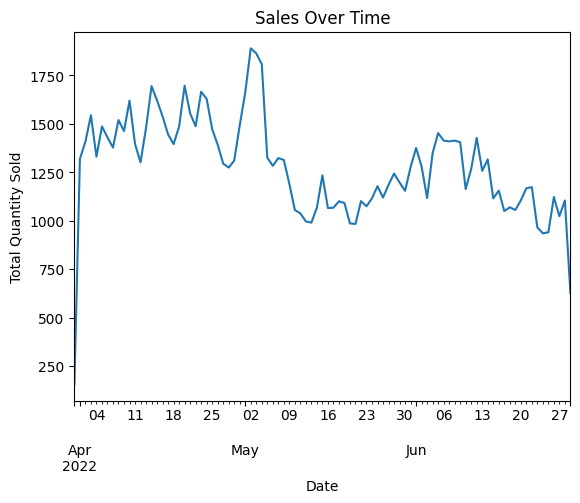

In [7]:
import matplotlib.pyplot as plt

# Plot total sales over time
data.groupby('Date')['Qty'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Over Time')
plt.show()


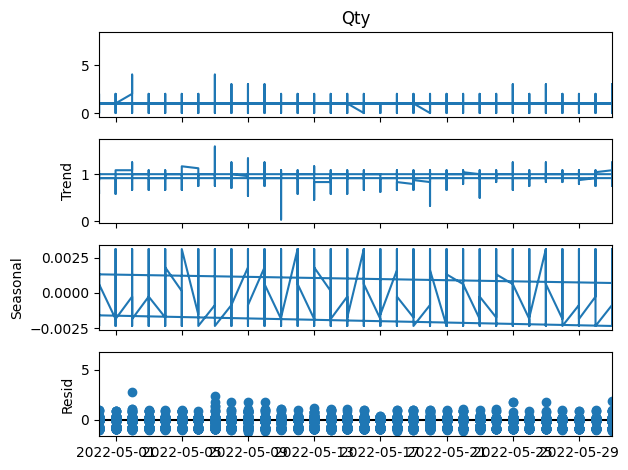

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data.set_index('Date')['Qty'], model='additive', period=12)
result.plot()
plt.show()


In [9]:
print(data.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'ASIN',
       ...
       'promotion-ids_VPC-44571-38707197 Coupon',
       'promotion-ids_VPC-44571-38707597 Coupon',
       'promotion-ids_VPC-44571-38708638 Coupon',
       'promotion-ids_VPC-44571-41445473 Coupon',
       'promotion-ids_VPC-44571-41445498 Coupon',
       'promotion-ids_VPC-44571-41445527 Coupon',
       'promotion-ids_VPC-44571-41445561 Coupon',
       'promotion-ids_VPC-44571-44201687 Coupon',
       'promotion-ids_VPC-44571-44201770 Coupon',
       'promotion-ids_VPC-44571-44201853 Coupon'],
      dtype='object', length=5832)


In [10]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your original DataFrame
# Step 1: Drop irrelevant or problematic columns
data = data.drop(columns=['Order ID','SKU','ASIN'])  # Drop irrelevant or problematic columns

# Step 2: Convert datetime columns to numeric features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data = data.drop(columns=['Date'])  # Drop the original datetime column

# Step 3: Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 4: Prepare features and target
features = data.drop(columns=['Qty'])
target = data['Qty']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Step 6: Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
predictions = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

# Optional: If you want to evaluate accuracy for integer-rounded predictions
rounded_predictions = [round(pred) for pred in predictions]
accuracy = accuracy_score(y_test, rounded_predictions)
print('Accuracy (rounded predictions):', accuracy)


Mean Squared Error: 0.0023453120571902807
Mean Absolute Error: 0.004754900366465545
R-squared: 0.941647067855254
Accuracy (rounded predictions): 0.9978544314243274


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
data['Time'] = np.arange(len(data))

# Train linear regression model
X = data[['Time']]
y = data['Qty']
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict linear trend
data['Linear_Trend'] = linear_model.predict(X)


In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply exponential smoothing
exp_model = SimpleExpSmoothing(data['Qty']).fit(smoothing_level=0.2, optimized=False)
data['Exp_Smoothing'] = exp_model.fittedvalues


c:\Users\tssat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# Apply moving average
data['Moving_Avg'] = data['Qty'].rolling(window=12).mean()


In [15]:
# Combine models by averaging (can use weighted average if needed)
data['Hybrid_Forecast'] = (data['Linear_Trend'] + data['Exp_Smoothing'] + data['Moving_Avg']) / 3

# Drop NaN values caused by moving average
data.dropna(inplace=True)


In [16]:
train = data.iloc[:-12]
test = data.iloc[-12:]


Mean Squared Error: 0.0006714059939832862
R^2 Score: 0.0


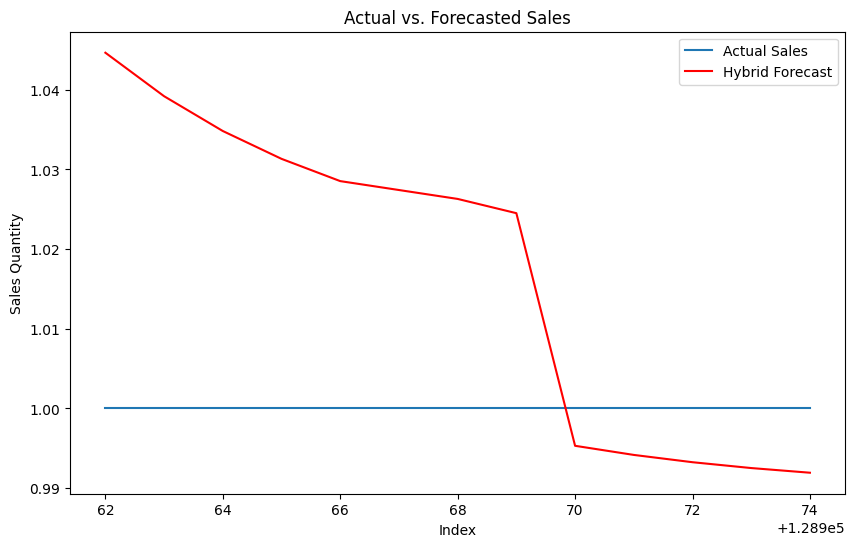

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(test['Qty'], test['Hybrid_Forecast'])
print('Mean Squared Error:', mse)

# Calculate R^2 score as a metric for regression accuracy
r2 = r2_score(test['Qty'], test['Hybrid_Forecast'])
print('R^2 Score:', r2)

# Plot actual vs. forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Qty'], label='Actual Sales')
plt.plot(test.index, test['Hybrid_Forecast'], label='Hybrid Forecast', color='red')
plt.xlabel('Index')
plt.ylabel('Sales Quantity')
plt.title('Actual vs. Forecasted Sales')
plt.legend()
plt.show()
